In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plot
import seaborn as sns


In [18]:
#retrieve schema
question = pd.read_csv('kaggle1/schema.csv')
question.shape
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [20]:
#retrieve mcq resposnes
mcq = pd.read_csv('kaggle1/multipleChoiceResponses.csv', encoding="ISO-8859-1",
                 low_memory=False)
mcq.shape

(16716, 228)

In [21]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


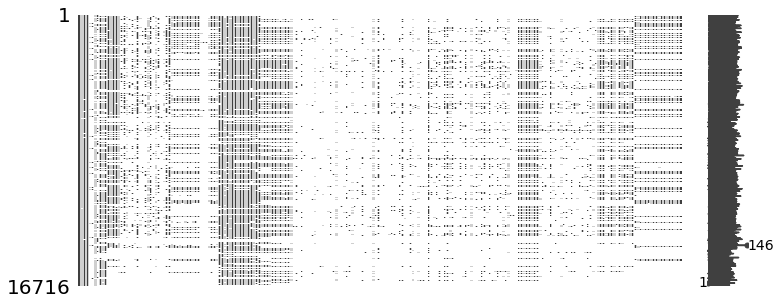

In [23]:
#retrieve NaN data and visualise

import missingno as ms
ms.matrix(mcq, figsize=(12,5))

# SURVEY STATISTICS

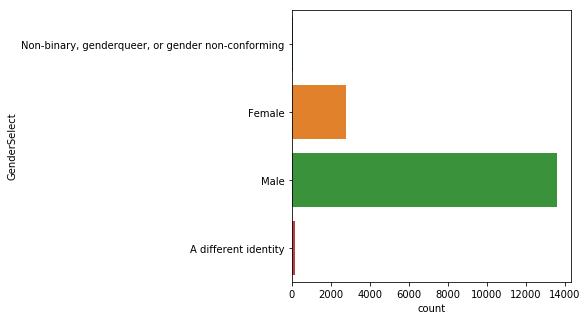

In [47]:
# by gender
plot.figure(figsize=(5, 5))
sns.countplot(y='GenderSelect', data = mcq)

In [29]:
#country response no.
condf = pd.DataFrame(mcq['Country'].value_counts())
condf['country'] = condf.index
condf.columns = ['No. of Responses', 'country']
condf = condf.reset_index().drop('index', axis=1)
condf.head(10)

,No. of Responses,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [33]:
#information about the age
mcq_des = mcq['Age'].describe()
mcq_des

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

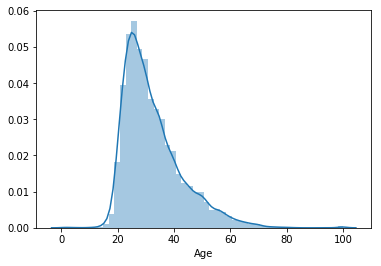

In [36]:
mcq_age = mcq['Age']
sns.distplot(mcq[mcq_age > 0]['Age'])

In [ ]:
#The mean age of the reponse group is 32 and as the age gets older,
#the number of reponses decreases.
#The graph is right-skewed that most responses are from the younger age groups

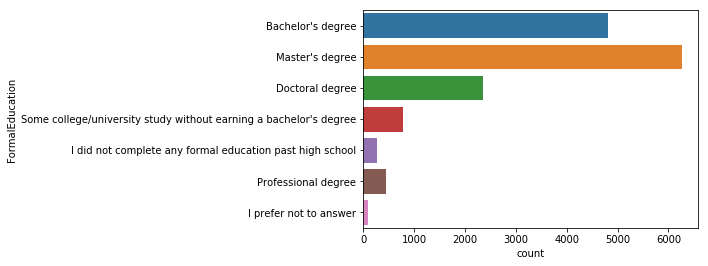

In [37]:
#by level of academic
sns.countplot(y='FormalEducation', data=mcq)

In [ ]:
#number of people with M.S. > number of B.S.

In [38]:
#Type of degrees

mcq_major_count = pd.DataFrame(
 mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
 mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
 mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['number of responses', 'ratio']
mcq_major_df

,number of responses,ratio
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


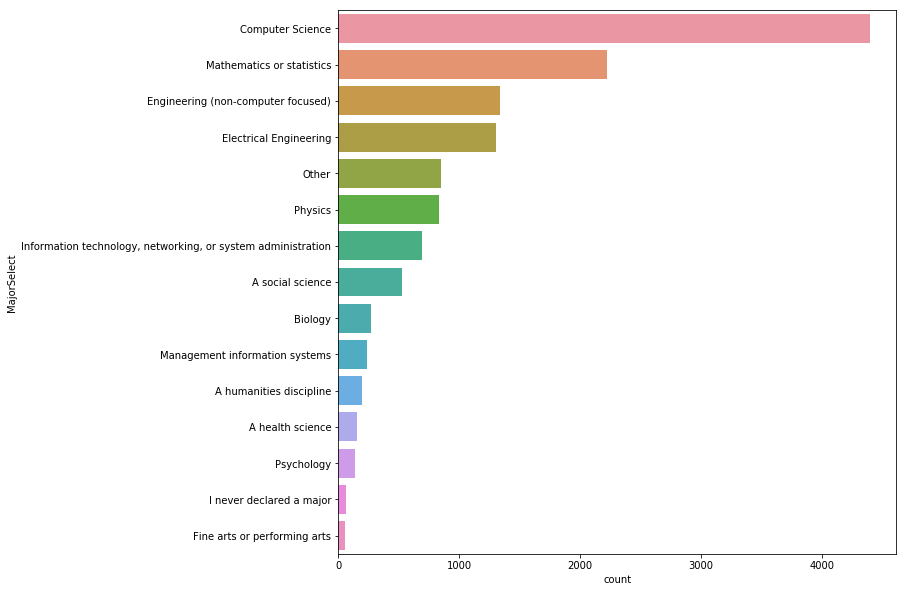

In [44]:
#degree of the current students in a desceding order

plot.figure(figsize=(10,10))
sns.countplot(y='MajorSelect', data=mcq, 
              order=mcq['MajorSelect'].value_counts().index)

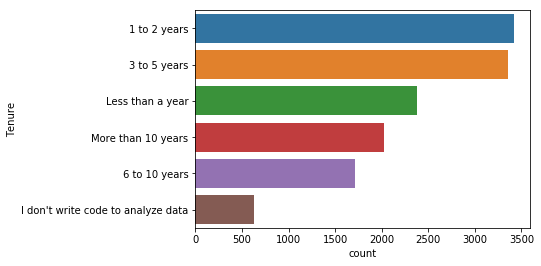

In [48]:
#To find whether respondants have the programming experience
# in the data science area

sns.countplot(y='Tenure',data=mcq, order=mcq['Tenure'].value_counts().index)

Number of interviewees in SG: 184


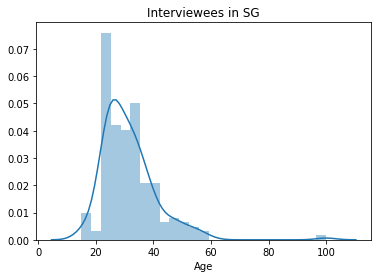

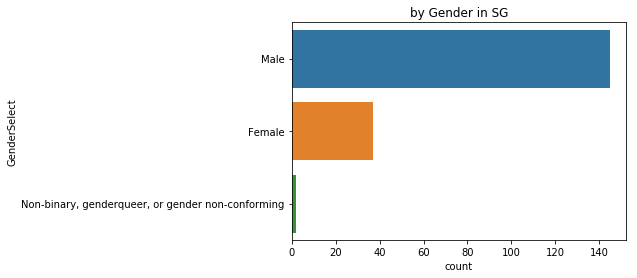

In [55]:
#To show the number of interviewees in Singapore

singapore = mcq.loc[(mcq['Country'] == 'Singapore')]
strsg = str(singapore.shape[0])
print('Number of interviewees in SG: ' + strsg)

#plot dist graph of interviewees by age
agedis = sns.distplot(singapore['Age'].dropna())
plot.title('Interviewees in SG')
plot.show()

#plot a graph by gender
gender_plot = sns.countplot(y='GenderSelect', data=singapore)
plot.title('by Gender in SG')
plot.show()

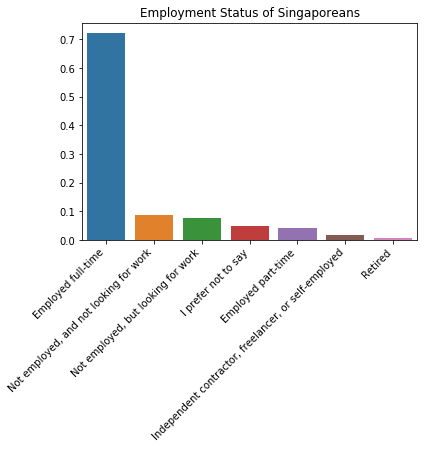

In [63]:
#Employment status of Singaporeans

sns.barplot(x=singapore['EmploymentStatus'].unique(), 
            y=singapore['EmploymentStatus'].value_counts()/len(singapore))
plot.xticks(rotation=45, ha='right')
plot.title('Employment Status of Singaporeans')
plot.ylabel('')
plot.show()

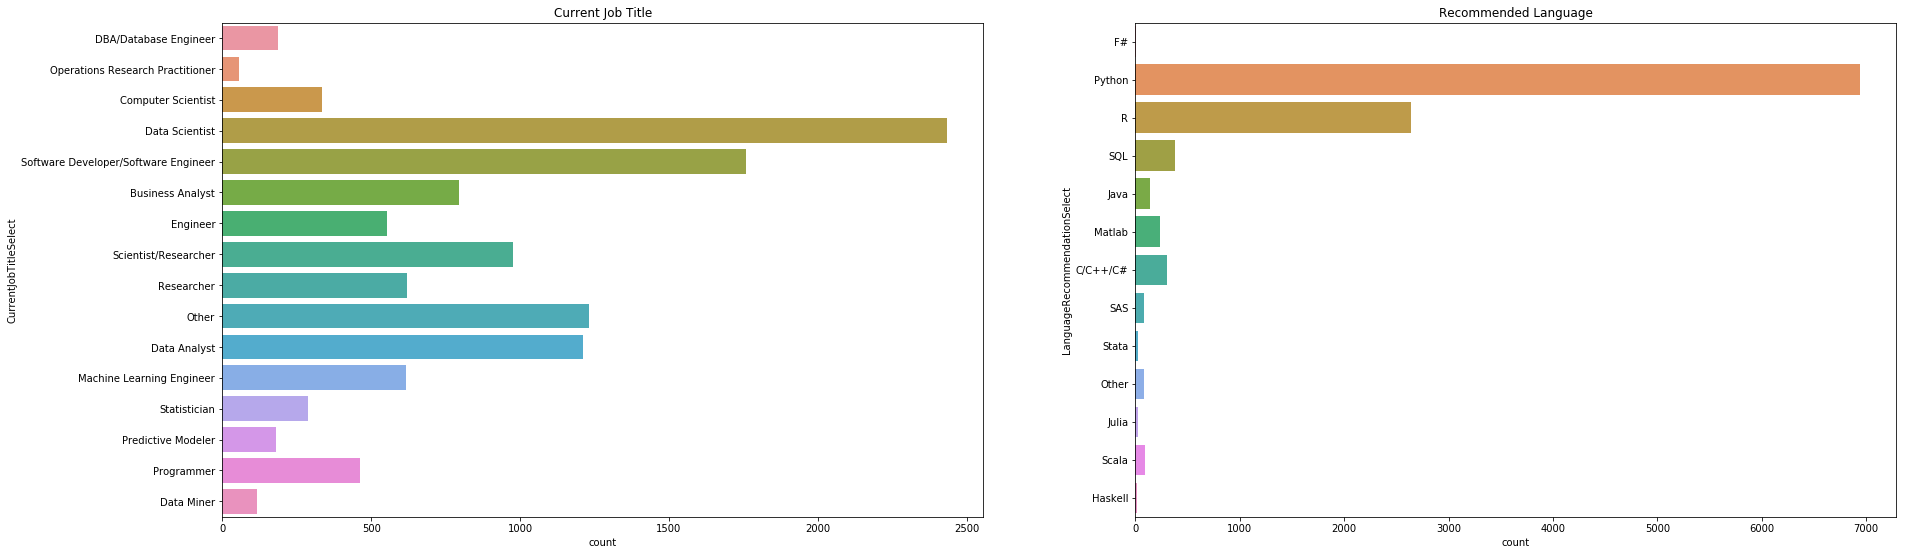

In [95]:
from matplotlib.gridspec import GridSpec

plot.figure(2, figsize=(30, 20))
tgrid = GridSpec(2, 2)
plot.subplot(tgrid[0, 1], title = 'Recommended Language')
sns.countplot(y='LanguageRecommendationSelect', data=mcq)
plot.subplot(tgrid[0, 0], title='Current Job Title')
sns.countplot(y='CurrentJobTitleSelect', data=mcq)


In [ ]:
#From the visualisation, Python, R and SQL are top 3 recommended languages for Data Scientist
#and we would be able to tell that this result is reliable as the most number of responses were from data scientists 
#who are engaged into the actual data science field and has greated understanding than other job categories

(7489, 228)


Text(0.5,1,'Recommended Language from Job Categories')

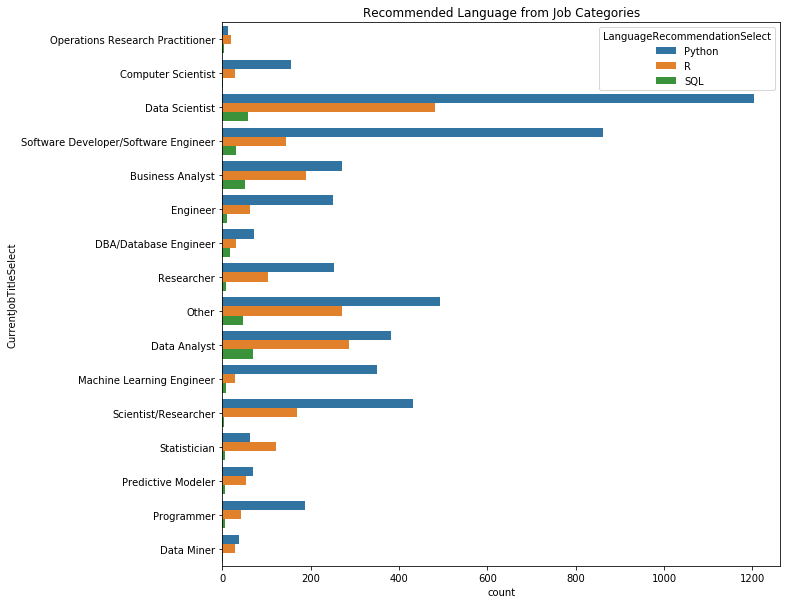

In [102]:
lr = mcq['LanguageRecommendationSelect']
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
(lr == 'Python') | (lr == 'R') | (lr == 'SQL'))]
print(data.shape)
plot.figure(figsize=(10, 10))
sns.countplot(y='CurrentJobTitleSelect',
 hue='LanguageRecommendationSelect',
 data=data)
plot.title('Recommended Language from Job Categories')

In [ ]:
#Data scientists are the one using Python the most and quite a number of them use R as well.
#Generally, Python is more preferred langauge across the job categories
#SQL might be a supporting langauge for data science work field due to its low number of being used. 
#Python is the main language.

Text(0.5,0.98,'What will be popular in 2018')

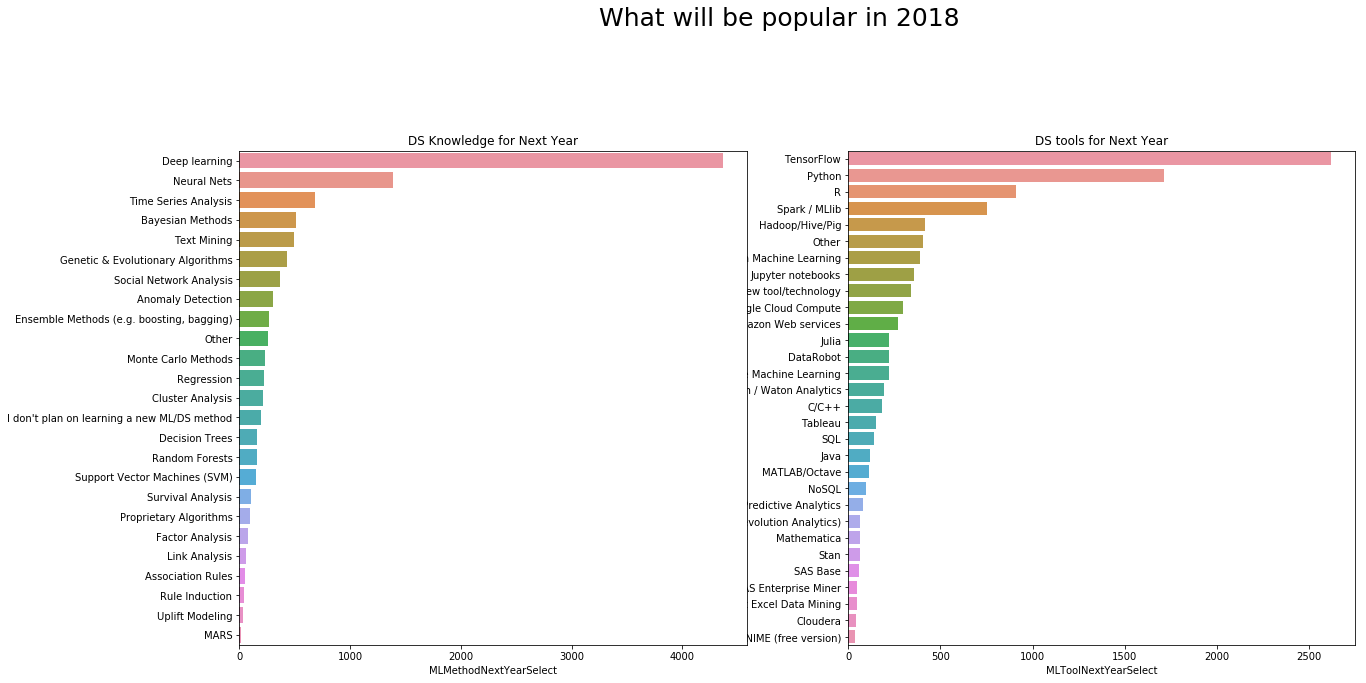

In [128]:
#What kind of data science tools and knowledge are recommended to learn in 2018?

mcq_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True)*100)
merged_df = mcq_tool_count.merge(mcq_tool_percent, left_index=True, right_index=True).head(30)
merged_df.columns=['Number of Responses', 'Percentage/%']
merged_df

plot.figure(figsize = (20, 20))
data = (mcq['MLToolNextYearSelect'].value_counts().head(30))
data1 = mcq['MLMethodNextYearSelect'].value_counts().head(30)

plot.figure(2, figsize=(20, 20))
tgrid = GridSpec(2, 2)
plot.subplot(tgrid[0, 1], title = 'DS tools for Next Year')
sns.barplot(y=data.index, x=data)
plot.subplot(tgrid[0, 0], title='DS Knowledge for Next Year')
sns.barplot(y=data1.index,x=data1)

plot.suptitle('What will be popular in 2018', fontsize=25)

In [ ]:
#It is highly recommened to learn Tensorflow as one of the DS tools followed by Python and R for DS programming langauge.
#For those who are willing to learn DS, it is recommended to learn deep learning, neural nets followed by time series analysis 
#as they are the top 3 DS knowledge which will be popular in 2018

